<img src='p223.png'></img>

In [53]:
import numpy as np
np.set_printoptions(precision=2)

In [54]:
t = 2
E = 6e6
mu = 0.25
alpha = 7e-6
P = 20

In [55]:
Nodes = np.array([[0.,0.],[2.,0.],[1.,3.]])
Nodes

array([[0., 0.],
       [2., 0.],
       [1., 3.]])

In [56]:
b = np.roll(Nodes[:,1], -1) - np.roll(Nodes[:,1], 1)
b

array([-3.,  3.,  0.])

In [57]:
c = np.roll(Nodes[:,0], 1) - np.roll(Nodes[:,0], -1)
c

array([-1., -1.,  2.])

In [58]:
A = 0.5*np.cross(Nodes[1]-Nodes[0], Nodes[2]-Nodes[0])
A

3.0

In [59]:
B = np.array([[b[0], 0., b[1], 0., b[2], 0.],
              [0., c[0], 0., c[1], 0., c[2]],
              [c[0], b[0], c[1], b[1], c[2], b[2]]]) / (2*A)
B

array([[-0.5 ,  0.  ,  0.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.17,  0.  , -0.17,  0.  ,  0.33],
       [-0.17, -0.5 , -0.17,  0.5 ,  0.33,  0.  ]])

In [60]:
D = E/(1-mu**2)*np.array([[1, mu, 0],
                          [mu, 1, 0],
                          [0, 0, (1-mu)/2]])
D

array([[6400000., 1600000.,       0.],
       [1600000., 6400000.,       0.],
       [      0.,       0., 2400000.]])

In [61]:
Ke = B.T@D@B*t*A
Ke / 133330

array([[ 75.,  15., -69.,  -3.,  -6., -12.],
       [ 15.,  35.,   3., -19., -18., -16.],
       [-69.,   3.,  75., -15.,  -6.,  12.],
       [ -3., -19., -15.,  35.,  18., -16.],
       [ -6., -18.,  -6.,  18.,  12.,   0.],
       [-12., -16.,  12., -16.,   0.,  32.]])

In [62]:
dof = np.array([0,1,3])

In [63]:
Ke[dof] = 0
Ke[:,dof] = 0
Ke[dof,dof] = 1

In [64]:
Ke

array([[ 1.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  1.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+07,  0.00e+00, -8.00e+05,  1.60e+06],
       [ 0.00e+00,  0.00e+00,  0.00e+00,  1.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00, -8.00e+05,  0.00e+00,  1.60e+06,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.60e+06,  0.00e+00,  0.00e+00,  4.27e+06]])

In [65]:
import matplotlib.pyplot as plt

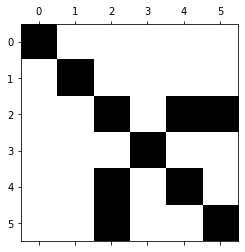

In [66]:
plt.spy(Ke)

In [67]:
L21 = np.linalg.norm(Nodes[2]-Nodes[1])
L21

3.1622776601683795

In [68]:
F21 = P*L21*t
F21

126.49110640673518

In [69]:
cost = Nodes[2,1]/L21
sint = (Nodes[1,0]-Nodes[2,0])/L21
cost, sint

(0.9486832980505138, 0.31622776601683794)

In [70]:
F = np.zeros(Nodes.shape[0]*2)
F

array([0., 0., 0., 0., 0., 0.])

In [71]:
F[[2,3]] = 0.5*F21*np.array([sint, cost])
F[[4,5]] = 0.5*F21*np.array([sint, cost])
F

array([ 0.,  0., 20., 60., 20., 60.])

In [72]:
F[dof] = 0
F

array([ 0.,  0., 20.,  0., 20., 60.])

In [73]:
U = np.linalg.solve(Ke, F)
U

array([ 0.00e+00,  0.00e+00,  8.33e-07, -0.00e+00,  1.29e-05,  1.38e-05])

In [74]:
NewNodes = Nodes + 1e4*U.reshape(-1,2)

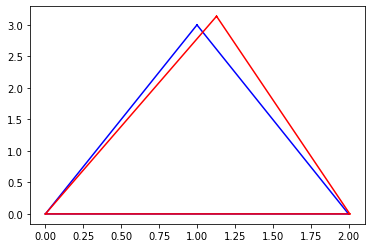

In [75]:
plt.triplot(Nodes[:,0], Nodes[:,1], [[0,1,2]], color='b')
plt.triplot(NewNodes[:,0], NewNodes[:,1], [[0,1,2]], color='r')